In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from shapely import wkt
import numpy as np
from shapely.geometry import Point


In [2]:

data = pd.read_csv('data/nyc_census.csv', dtype={'GEOID20': str})
data.head()

,census,county,state,income,population,tract,GEOID20,OBJECTID_1,OBJECTID,ALAND20,...,INTPTLAT20,INTPTLON20,CBSA10,METRO_NAME,HRS2020,RHRS20,Shape_Leng,Shape_Area,EQINTER20,area
0,92.02,Kings County,New York,827.0,3453.0,9202,36047009202,8876,10858,56624.0,...,40.644652,-73.998238,35620.0,"New York-Newark-Jersey City, N",3.0,3.0,0.009992,0.000006,3,56625
1,94.01,Kings County,New York,484.0,2293.0,9401,36047009401,8901,10896,75483.0,...,40.644022,-74.002481,35620.0,"New York-Newark-Jersey City, N",3.0,3.0,0.011616,0.000008,3,75483
2,94.02,Kings County,New York,631.0,2746.0,9402,36047009402,8875,10857,75543.0,...,40.642691,-74.000278,35620.0,"New York-Newark-Jersey City, N",3.0,3.0,0.011615,0.000008,3,75544
3,96.00,Kings County,New York,1273.0,5858.0,9600,36047009600,8355,10264,150752.0,...,40.646015,-74.005785,35620.0,"New York-Newark-Jersey City, N",3.0,3.0,0.016759,0.000016,3,150750
4,98.00,Kings County,New York,1247.0,6021.0,9800,36047009800,8356,10265,151006.0,...,40.643776,-74.008115,35620.0,"New York-Newark-Jersey City, N",3.0,3.0,0.016761,0.000016,3,151005


In [3]:
data.columns

Index(['census', 'county', 'state', 'income', 'population', 'tract', 'GEOID20',
       'OBJECTID_1', 'OBJECTID', 'ALAND20', 'AWATER20', 'INTPTLAT20',
       'INTPTLON20', 'CBSA10', 'METRO_NAME', 'HRS2020', 'RHRS20', 'Shape_Leng',
       'Shape_Area', 'EQINTER20', 'area'],
      dtype='object')

In [4]:
neighborhoods = gpd.read_file('data/neighborhood.geojson')
neighborhoods.head()

,ntacode,shape_area,county_fips,ntaname,shape_leng,boro_name,boro_code,geometry
0,QN08,77412747.847,081,St. Albans,45401.316803,Queens,4,"MULTIPOLYGON (((-73.75205 40.70523, -73.75174 ..."
1,BX28,25666124.5948,005,Van Cortlandt Village,21945.719299,Bronx,2,"MULTIPOLYGON (((-73.88705 40.88435, -73.88705 ..."
2,QN55,82461393.7368,081,South Ozone Park,36708.1693055,Queens,4,"MULTIPOLYGON (((-73.80577 40.68293, -73.80552 ..."
3,BK50,82089678.6389,047,Canarsie,43703.6096661,Brooklyn,3,"MULTIPOLYGON (((-73.88834 40.64671, -73.88835 ..."
4,BX41,14716710.7402,005,Mount Hope,18937.247819,Bronx,2,"MULTIPOLYGON (((-73.89561 40.85457, -73.89662 ..."


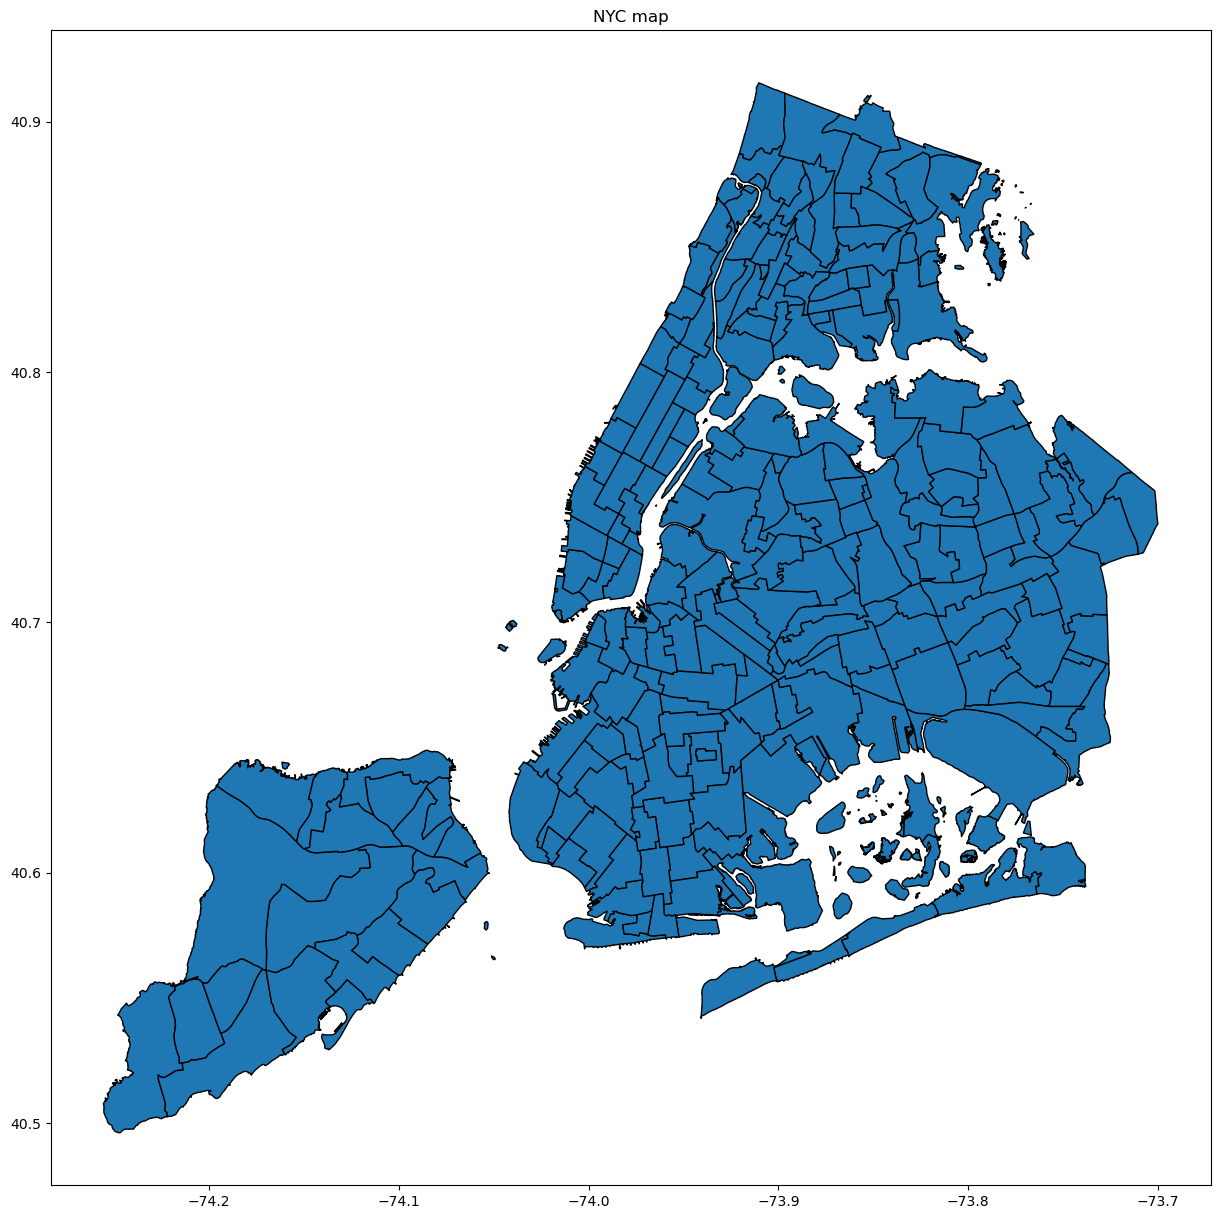

In [5]:
fig, ax = plt.subplots(figsize=(15, 15))
neighborhoods.plot(ax=ax, legend=True, edgecolor='black')
plt.title('NYC map')
plt.axis('on')
plt.show()


In [6]:
data['geometry'] = data.apply(lambda x: Point(float(x['INTPTLON20']), float(x['INTPTLAT20'])), axis=1)
data_gdf = gpd.GeoDataFrame(data, geometry='geometry')

In [7]:
merged_data = gpd.sjoin(neighborhoods, data_gdf, how='inner', op='intersects')

D:\Anaconda\envs\cusp7033\lib\site-packages\IPython\core\interactiveshell.py:3466: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):
C:\Users\PeiSZ\AppData\Local\Temp\ipykernel_117036\434363479.py:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: None

  merged_data = gpd.sjoin(neighborhoods, data_gdf, how='inner', op='intersects')


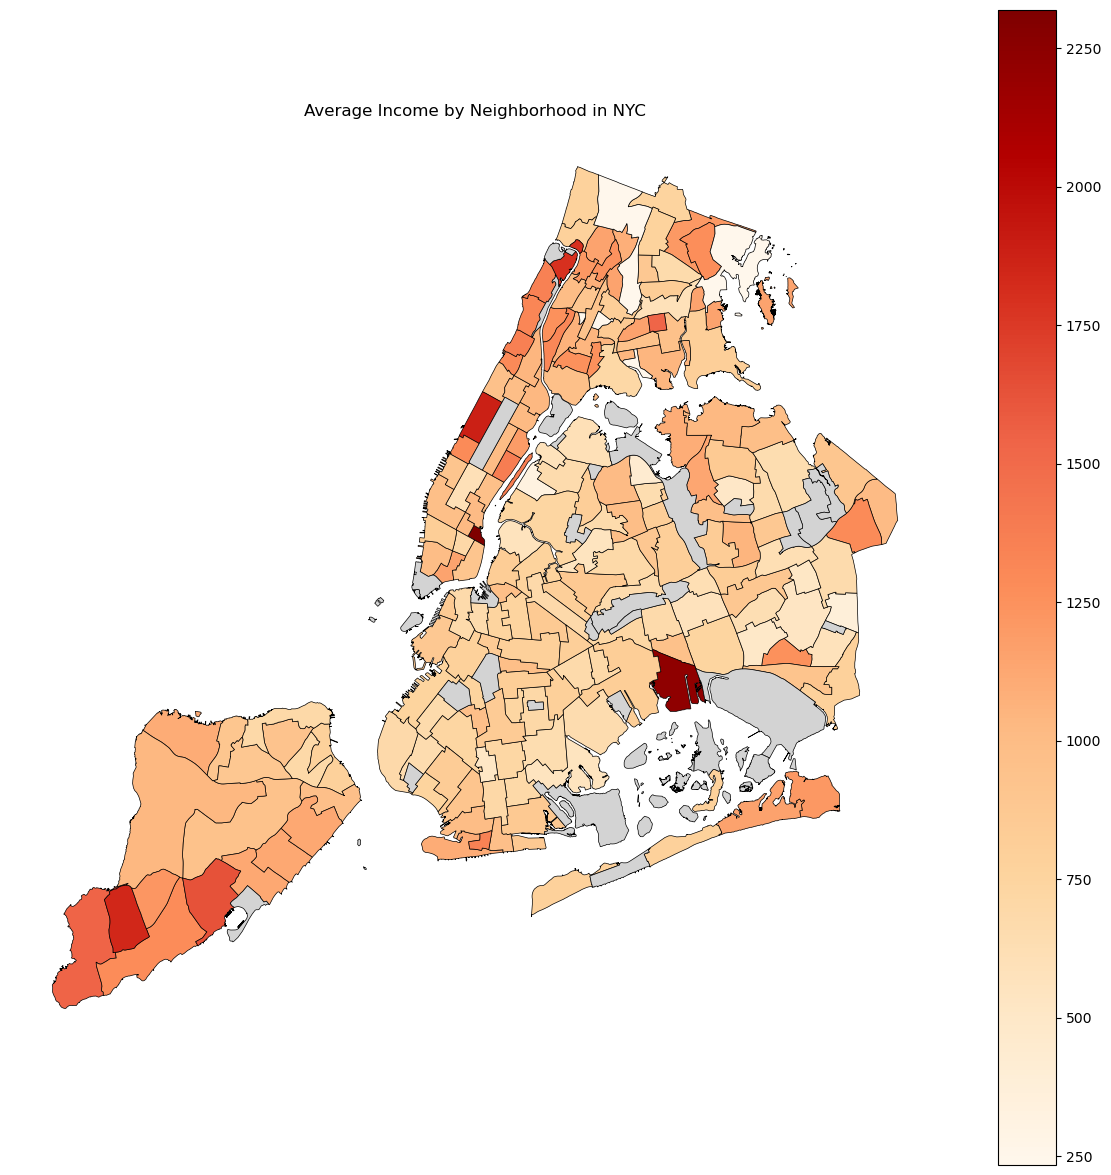

In [8]:
income = merged_data.groupby('ntacode')['income'].mean().reset_index()
neighborhoods = neighborhoods.merge(income, on='ntacode', how='left')
# neighborhoods['income'] = neighborhoods['income'].fillna(-1)
fig, ax = plt.subplots(figsize=(15, 15))
neighborhoods.plot(ax=ax, column='income', legend=True, cmap='OrRd', linewidth=0.5, edgecolor='black', missing_kwds={'color': 'lightgrey', 'label': 'No Data'})
plt.title('Average Income by Neighborhood in NYC')
plt.axis('off')
plt.show()

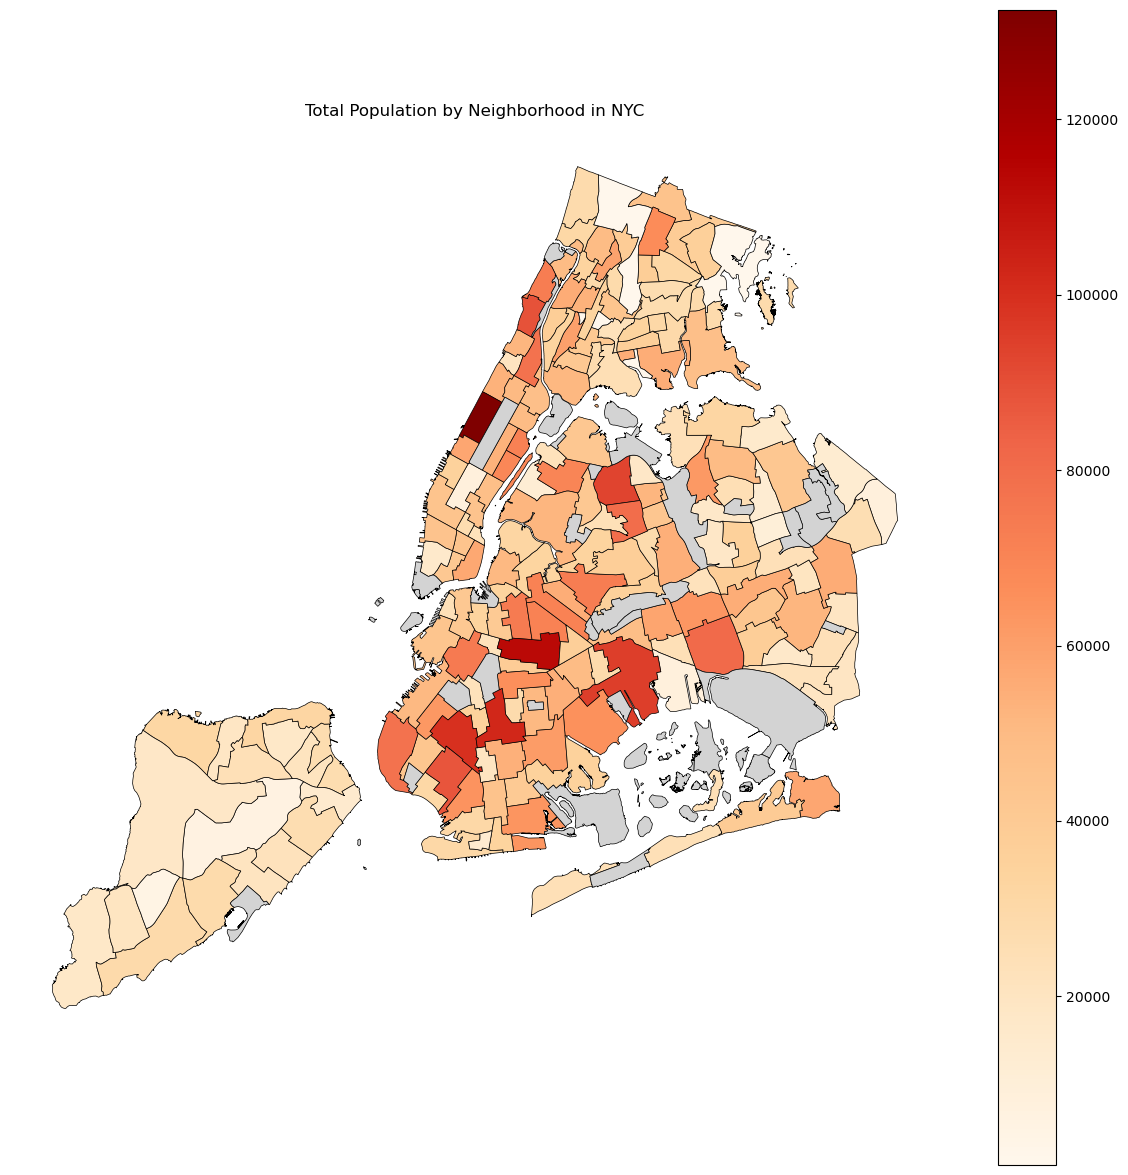

In [9]:
pop = merged_data.groupby('ntacode')['population'].sum().reset_index()
neighborhoods = neighborhoods.merge(pop, on='ntacode', how='left')
# neighborhoods['population'] = neighborhoods['population'].fillna(-1)

fig, ax = plt.subplots(figsize=(15, 15))
neighborhoods.plot(ax=ax, column='population', legend=True, cmap='OrRd', linewidth=0.5, edgecolor='black', missing_kwds={'color': 'lightgrey', 'label': 'No Data'})
plt.title('Total Population by Neighborhood in NYC')
plt.axis('off')
plt.show()


In [10]:
building = pd.read_csv('nyc_pluto_24v1_csv/pluto_24v1_1.csv', dtype={'bct2020':str, 'bctcb2020': str})
building

C:\Users\PeiSZ\AppData\Local\Temp\ipykernel_117036\2667544196.py:1: DtypeWarning: Columns (21,22,24,26,28,65,66,81,88) have mixed types. Specify dtype option on import or set low_memory=False.
  building = pd.read_csv('nyc_pluto_24v1_csv/pluto_24v1_1.csv', dtype={'bct2020':str, 'bctcb2020': str})


,borough,block,lot,cd,bct2020,bctcb2020,ct2010,cb2010,schooldist,council,...,appbbl,appdate,plutomapid,firm07_flag,pfirm15_flag,version,dcpedited,latitude,longitude,notes
0,QN,798,31,401.0,4012301,40123012006,123.01,2006.0,30.0,22.0,...,NaN,NaN,1,NaN,NaN,24v1.1,NaN,40.775577,-73.900898,NaN
1,BK,6429,16,311.0,3017200,30172002004,172.00,2004.0,20.0,50.0,...,NaN,NaN,1,NaN,NaN,24v1.1,NaN,40.606009,-74.012389,NaN
2,BK,7790,42,318.0,3073200,30732001004,732.00,1004.0,22.0,45.0,...,NaN,NaN,1,NaN,NaN,24v1.1,NaN,40.627159,-73.934841,NaN
3,BK,7197,52,315.0,3037401,30374011000,374.01,2000.0,21.0,47.0,...,NaN,NaN,1,NaN,NaN,24v1.1,NaN,40.589133,-73.968723,NaN
4,QN,15318,35,414.0,4107201,41072011032,1072.01,1032.0,27.0,32.0,...,NaN,NaN,1,1.0,1.0,24v1.1,NaN,40.603476,-73.820367,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
858567,SI,6850,104,503.0,5020804,50208042006,208.04,2006.0,31.0,51.0,...,NaN,NaN,1,NaN,NaN,24v1.1,NaN,40.540667,-74.198983,NaN
858568,SI,7916,20,503.0,5024401,50244011003,244.01,1002.0,31.0,51.0,...,NaN,NaN,1,NaN,NaN,24v1.1,NaN,40.507882,-74.247685,NaN
858569,SI,1252,10,501.0,5031902,50319023002,319.02,3003.0,31.0,49.0,...,NaN,NaN,1,NaN,NaN,24v1.1,NaN,40.637007,-74.164411,NaN
858570,QN,16103,75,414.0,4094202,40942022002,942.02,1010.0,27.0,31.0,...,NaN,NaN,1,1.0,1.0,24v1.1,t,40.590451,-73.809992,NaN


In [15]:
building.columns

Index(['borough', 'block', 'lot', 'cd', 'bct2020', 'bctcb2020', 'ct2010',
       'cb2010', 'schooldist', 'council', 'zipcode', 'firecomp', 'policeprct',
       'healthcenterdistrict', 'healtharea', 'sanitboro', 'sanitdistrict',
       'sanitsub', 'address', 'zonedist1', 'zonedist2', 'zonedist3',
       'zonedist4', 'overlay1', 'overlay2', 'spdist1', 'spdist2', 'spdist3',
       'ltdheight', 'splitzone', 'bldgclass', 'landuse', 'easements',
       'ownertype', 'ownername', 'lotarea', 'bldgarea', 'comarea', 'resarea',
       'officearea', 'retailarea', 'garagearea', 'strgearea', 'factryarea',
       'otherarea', 'areasource', 'numbldgs', 'numfloors', 'unitsres',
       'unitstotal', 'lotfront', 'lotdepth', 'bldgfront', 'bldgdepth', 'ext',
       'proxcode', 'irrlotcode', 'lottype', 'bsmtcode', 'assessland',
       'assesstot', 'exempttot', 'yearbuilt', 'yearalter1', 'yearalter2',
       'histdist', 'landmark', 'builtfar', 'residfar', 'commfar', 'facilfar',
       'borocode', 'bbl', 'cond

In [11]:
building['geometry'] = building.apply(lambda x: Point(float(x['longitude']), float(x['latitude'])), axis=1)
building_gdf = gpd.GeoDataFrame(building, geometry='geometry')
merged_data2 = gpd.sjoin(neighborhoods, building_gdf, how='inner', op='intersects')

D:\Anaconda\envs\cusp7033\lib\site-packages\IPython\core\interactiveshell.py:3466: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):
C:\Users\PeiSZ\AppData\Local\Temp\ipykernel_117036\1715348646.py:3: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: None

  merged_data2 = gpd.sjoin(neighborhoods, building_gdf, how='inner', op='intersects')


D:\Anaconda\envs\cusp7033\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


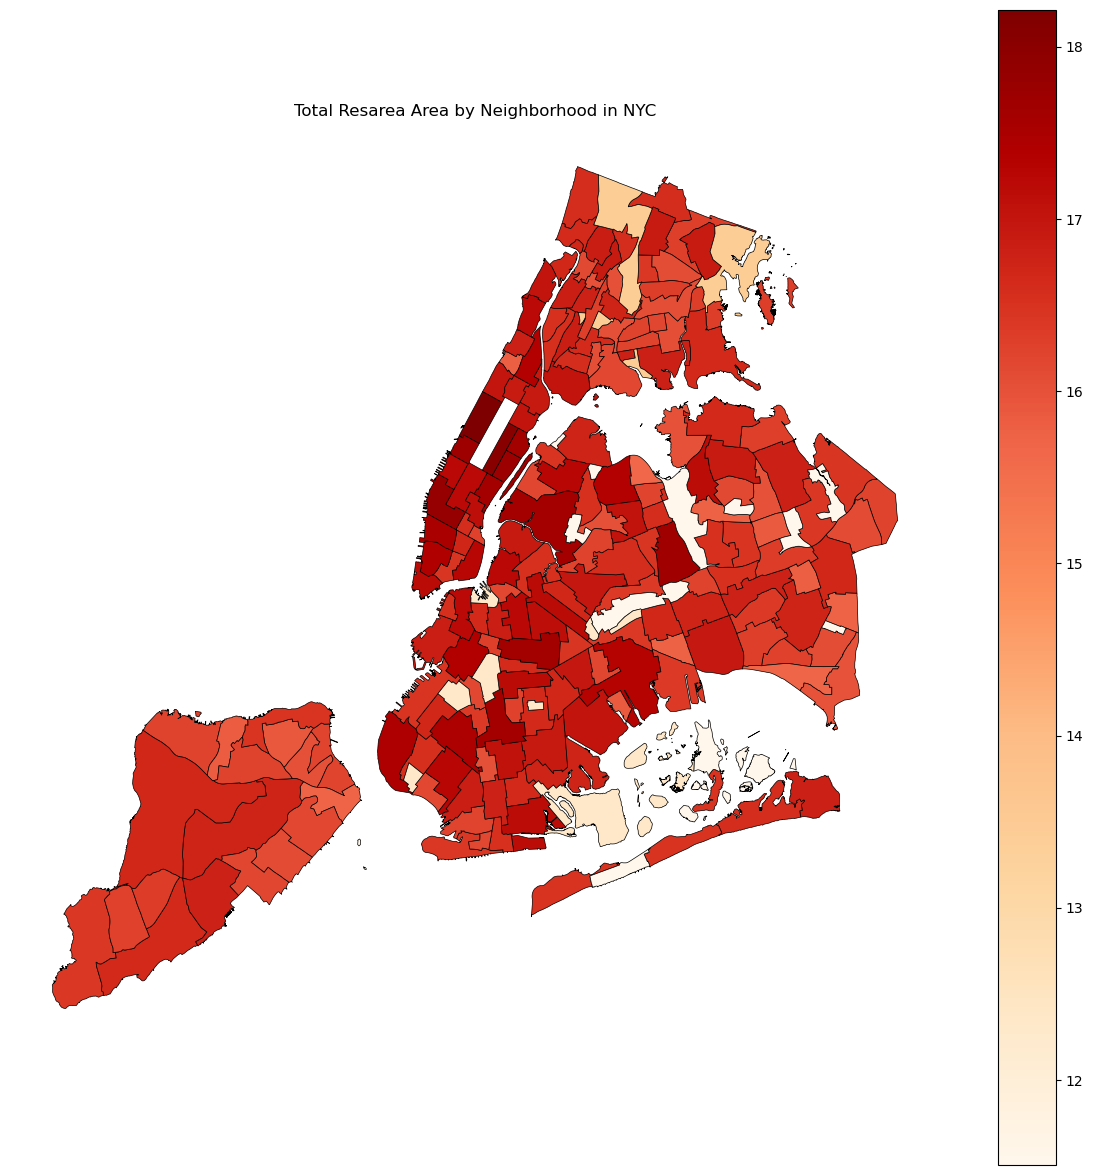

In [12]:
resarea = merged_data2.groupby('ntacode')['resarea'].sum().reset_index(name='resarea')
neighborhoods = neighborhoods.merge(resarea, on='ntacode', how='left')
neighborhoods['ln_resarea'] = np.log(neighborhoods['resarea'])
neighborhoods = neighborhoods.dropna(subset=['ln_resarea'])
neighborhoods = neighborhoods.loc[neighborhoods['ln_resarea'] >= 0]

fig, ax = plt.subplots(figsize=(15, 15))
neighborhoods.plot(ax=ax, column='ln_resarea', legend=True, cmap='OrRd', linewidth=0.5, edgecolor='black', missing_kwds={'color': 'lightgrey', 'label': 'No Data'})
plt.title('Total Resarea Area by Neighborhood in NYC')
plt.axis('off')
plt.show()

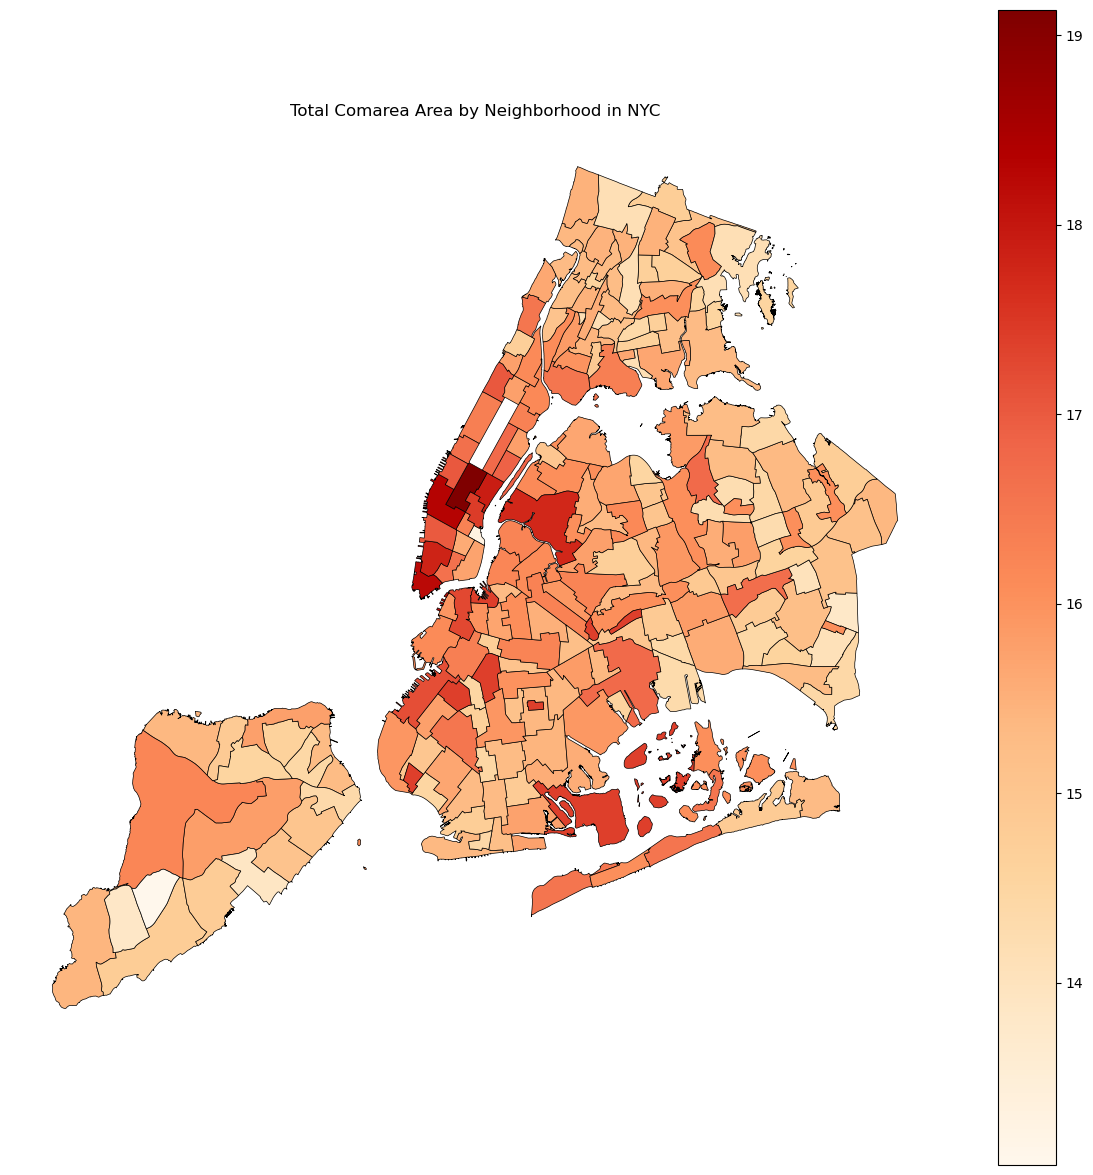

In [13]:
comarea = merged_data2.groupby('ntacode')['comarea'].sum().reset_index(name='comarea')
neighborhoods = neighborhoods.merge(comarea, on='ntacode', how='left')
neighborhoods['ln_comarea'] = np.log(neighborhoods['comarea'])
fig, ax = plt.subplots(figsize=(15, 15))
neighborhoods.plot(ax=ax, column='ln_comarea', legend=True, cmap='OrRd', linewidth=0.5, edgecolor='black', missing_kwds={'color': 'lightgrey', 'label': 'No Data'})
plt.title('Total Comarea Area by Neighborhood in NYC')
plt.axis('off')
plt.show()

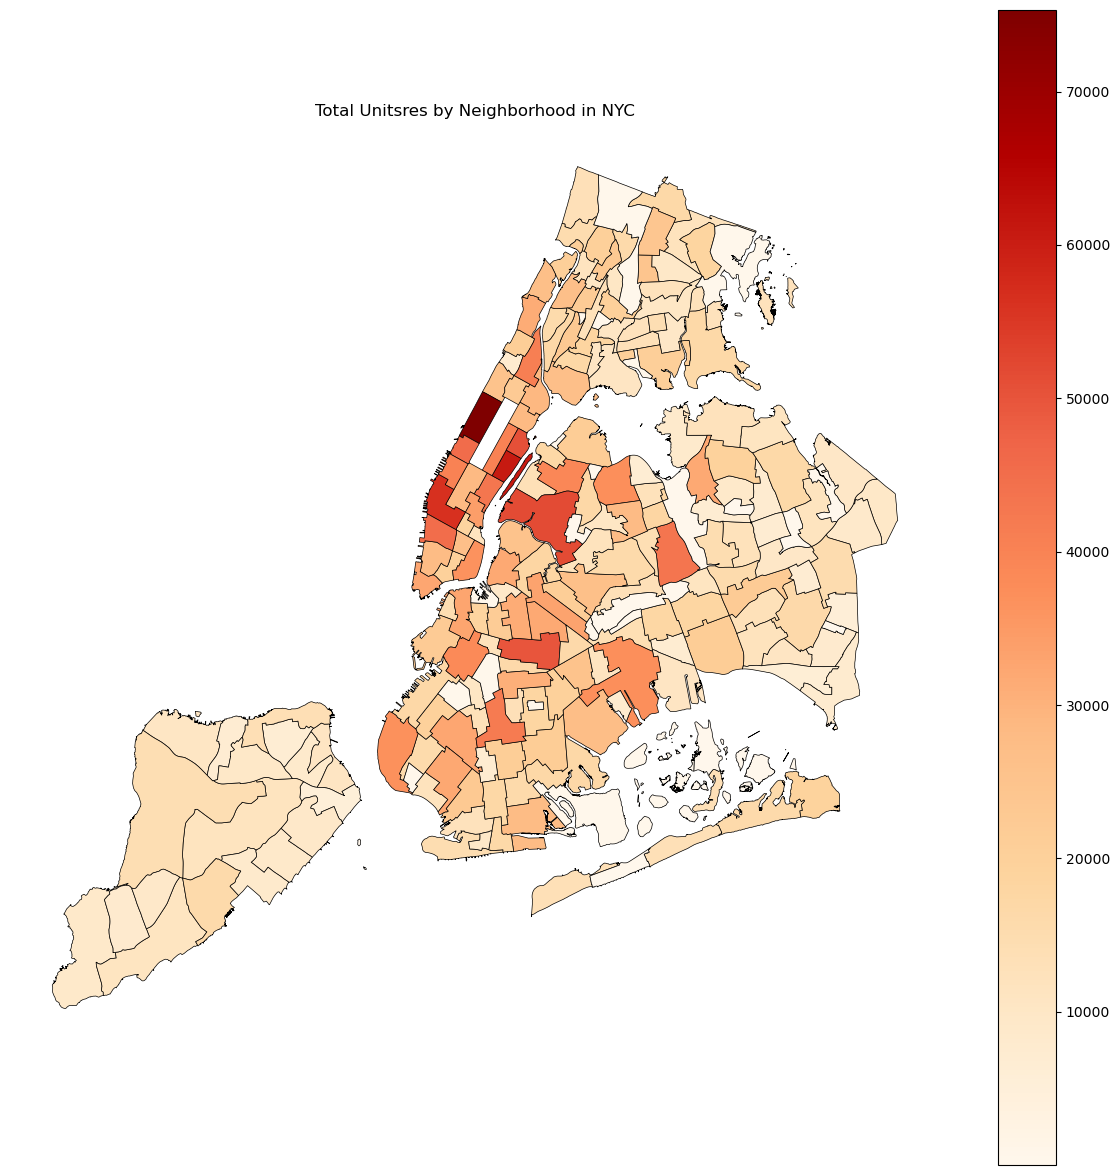

In [14]:
unitsres = merged_data2.groupby('ntacode')['unitsres'].sum().reset_index(name='unitsres')

neighborhoods = neighborhoods.merge(unitsres, on='ntacode', how='left')
fig, ax = plt.subplots(figsize=(15, 15))
neighborhoods.plot(ax=ax, column='unitsres', legend=True, cmap='OrRd', linewidth=0.5, edgecolor='black', missing_kwds={'color': 'lightgrey', 'label': 'No Data'})
plt.title('Total Unitsres by Neighborhood in NYC')
plt.axis('off')
plt.show()